In [380]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns 

In [381]:
data = pd.read_csv("Uber Request Data.csv")
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [382]:
data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [383]:
data['Driver id'].fillna(0 , inplace=True) 
data['Drop timestamp'].fillna( "No-Ridee" , inplace=True)

In [384]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,0.0,No Cars Available,15-07-2016 23:49:03,No-Ridee
6741,6752,Airport,0.0,No Cars Available,15-07-2016 23:50:05,No-Ridee
6742,6751,City,0.0,No Cars Available,15-07-2016 23:52:06,No-Ridee
6743,6754,City,0.0,No Cars Available,15-07-2016 23:54:39,No-Ridee


In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          6745 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     6745 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [386]:
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'] , format='mixed')

In [387]:
data['Drop timestamp'] = pd.to_datetime(data['Drop timestamp'] , format = 'mixed' , errors='coerce')

In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          6745 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [389]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,0.0,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,0.0,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,0.0,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,0.0,No Cars Available,2016-07-15 23:54:39,NaT


In [390]:
#What time of day (morning, afternoon, evening, night) receives the most ride requests?

for i in data['Request timestamp']:
    Day = data['Request timestamp'].dt.day
    week = data['Request timestamp'].dt.day_name()
    Month = data['Request timestamp'].dt.month_name()

    data['Day'] = Day
    data['Week_Day'] = week
    data['Month'] = Month

In [391]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day,Week_Day,Month
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,Monday,November
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,Monday,November
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,Wednesday,December
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,Wednesday,December
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,Wednesday,July
...,...,...,...,...,...,...,...,...,...
6740,6745,City,0.0,No Cars Available,2016-07-15 23:49:03,NaT,15,Friday,July
6741,6752,Airport,0.0,No Cars Available,2016-07-15 23:50:05,NaT,15,Friday,July
6742,6751,City,0.0,No Cars Available,2016-07-15 23:52:06,NaT,15,Friday,July
6743,6754,City,0.0,No Cars Available,2016-07-15 23:54:39,NaT,15,Friday,July


In [392]:
#What time of day (morning, afternoon, evening, night) receives the most ride requests?
data['Request Time'] = data['Request timestamp'].dt.strftime('%I:%M:%S %p')
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day,Week_Day,Month,Request Time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,Monday,November,11:51:00 AM
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,Monday,November,05:57:00 PM
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,Wednesday,December,09:17:00 AM
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,Wednesday,December,09:08:00 PM
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,Wednesday,July,08:33:16 AM
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,0.0,No Cars Available,2016-07-15 23:49:03,NaT,15,Friday,July,11:49:03 PM
6741,6752,Airport,0.0,No Cars Available,2016-07-15 23:50:05,NaT,15,Friday,July,11:50:05 PM
6742,6751,City,0.0,No Cars Available,2016-07-15 23:52:06,NaT,15,Friday,July,11:52:06 PM
6743,6754,City,0.0,No Cars Available,2016-07-15 23:54:39,NaT,15,Friday,July,11:54:39 PM


In [393]:
data['Request Time'] = pd.to_datetime(data['Request Time'])

C:\Users\Deep Kothari\AppData\Local\Temp\ipykernel_9896\1624050430.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Request Time'] = pd.to_datetime(data['Request Time'])


In [394]:
data['AM/PM'] = data['Request Time'].dt.strftime("%p")

In [395]:
data.drop(columns=['Request Time'] , axis=1 , inplace=True)

In [396]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day,Week_Day,Month,AM/PM
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,Monday,November,AM
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,Monday,November,PM
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,Wednesday,December,AM
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,Wednesday,December,PM
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,Wednesday,July,AM
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,0.0,No Cars Available,2016-07-15 23:49:03,NaT,15,Friday,July,PM
6741,6752,Airport,0.0,No Cars Available,2016-07-15 23:50:05,NaT,15,Friday,July,PM
6742,6751,City,0.0,No Cars Available,2016-07-15 23:52:06,NaT,15,Friday,July,PM
6743,6754,City,0.0,No Cars Available,2016-07-15 23:54:39,NaT,15,Friday,July,PM


In [397]:
#What time of day (morning, afternoon, evening, night) receives the most ride requests?
data['AM/PM'].value_counts()

AM/PM
PM    3650
AM    3095
Name: count, dtype: int64

In [398]:
#Which day of the week has the highest number of ride requests?
data['Week_Day'].value_counts()

Week_Day
Wednesday    2644
Friday       1381
Monday       1367
Thursday     1353
Name: count, dtype: int64

In [399]:
data['Status'].value_counts() * 100 / 6745

Status
Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: count, dtype: float64

<Axes: ylabel='count'>

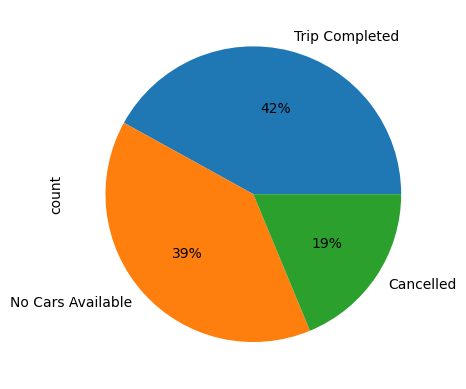

In [400]:
(data['Status'].value_counts() * 100 / 6745).plot(kind='pie' , autopct='%1.0f%%')

In [401]:
# What is the average wait time for completed vs. canceled requests?
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day,Week_Day,Month,AM/PM
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,Monday,November,AM
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,Monday,November,PM
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,Wednesday,December,AM
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,Wednesday,December,PM
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,Wednesday,July,AM
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,0.0,No Cars Available,2016-07-15 23:49:03,NaT,15,Friday,July,PM
6741,6752,Airport,0.0,No Cars Available,2016-07-15 23:50:05,NaT,15,Friday,July,PM
6742,6751,City,0.0,No Cars Available,2016-07-15 23:52:06,NaT,15,Friday,July,PM
6743,6754,City,0.0,No Cars Available,2016-07-15 23:54:39,NaT,15,Friday,July,PM


In [402]:
##Which drivers have the highest rate of ride cancellations?
data[data['Status'] == 'Cancelled'].groupby(['Driver id'])['Status'].value_counts().sort_values(ascending=False)

Driver id  Status   
84.0       Cancelled    12
54.0       Cancelled    11
206.0      Cancelled    10
142.0      Cancelled    10
267.0      Cancelled     9
                        ..
208.0      Cancelled     1
123.0      Cancelled     1
188.0      Cancelled     1
162.0      Cancelled     1
300.0      Cancelled     1
Name: count, Length: 295, dtype: int64

In [403]:
#Which drivers have completed the most rides?
data[data['Status'] == 'Trip Completed'].groupby(['Driver id'])['Status'].value_counts().sort_values(ascending=False)

Driver id  Status        
22.0       Trip Completed    16
233.0      Trip Completed    15
184.0      Trip Completed    15
126.0      Trip Completed    14
107.0      Trip Completed    14
                             ..
216.0      Trip Completed     5
93.0       Trip Completed     5
169.0      Trip Completed     5
300.0      Trip Completed     5
117.0      Trip Completed     4
Name: count, Length: 300, dtype: int64

In [404]:
#What is the average time taken by each driver from request to drop?
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day,Week_Day,Month,AM/PM
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,Monday,November,AM
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,Monday,November,PM
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,Wednesday,December,AM
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,Wednesday,December,PM
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,Wednesday,July,AM
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,0.0,No Cars Available,2016-07-15 23:49:03,NaT,15,Friday,July,PM
6741,6752,Airport,0.0,No Cars Available,2016-07-15 23:50:05,NaT,15,Friday,July,PM
6742,6751,City,0.0,No Cars Available,2016-07-15 23:52:06,NaT,15,Friday,July,PM
6743,6754,City,0.0,No Cars Available,2016-07-15 23:54:39,NaT,15,Friday,July,PM


In [405]:
data['AVGTime'] =  (data['Drop timestamp'] - data['Request timestamp'])

In [406]:
data['AVGTime'].mean()

Timedelta('-1 days +13:14:01.893323914')

In [407]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day,Week_Day,Month,AM/PM,AVGTime
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,Monday,November,AM,0 days 01:09:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,Monday,November,PM,0 days 00:50:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,Wednesday,December,AM,0 days 00:41:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,Wednesday,December,PM,0 days 00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,Wednesday,July,AM,0 days 00:52:31
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,0.0,No Cars Available,2016-07-15 23:49:03,NaT,15,Friday,July,PM,NaT
6741,6752,Airport,0.0,No Cars Available,2016-07-15 23:50:05,NaT,15,Friday,July,PM,NaT
6742,6751,City,0.0,No Cars Available,2016-07-15 23:52:06,NaT,15,Friday,July,PM,NaT
6743,6754,City,0.0,No Cars Available,2016-07-15 23:54:39,NaT,15,Friday,July,PM,NaT


In [408]:
data['Status'].value_counts()

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

In [409]:
#Which drivers are more likely to accept or cancel a request at different pickup points?
data[(data['Status'] == 'Cancelled') | (data['Status'] == 'Trip Completed')].groupby(['Pickup point' , 'Driver id'])["Status"].value_counts().sort_values(ascending=False)

Pickup point  Driver id  Status        
City          84.0       Cancelled         11
Airport       225.0      Trip Completed    10
City          54.0       Cancelled         10
              23.0       Trip Completed    10
              274.0      Trip Completed    10
                                           ..
Airport       163.0      Cancelled          1
              166.0      Trip Completed     1
              56.0       Cancelled          1
              168.0      Cancelled          1
City          300.0      Trip Completed     1
Name: count, Length: 1032, dtype: int64

In [410]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day,Week_Day,Month,AM/PM,AVGTime
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,Monday,November,AM,0 days 01:09:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,Monday,November,PM,0 days 00:50:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,Wednesday,December,AM,0 days 00:41:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,Wednesday,December,PM,0 days 00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,Wednesday,July,AM,0 days 00:52:31
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,0.0,No Cars Available,2016-07-15 23:49:03,NaT,15,Friday,July,PM,NaT
6741,6752,Airport,0.0,No Cars Available,2016-07-15 23:50:05,NaT,15,Friday,July,PM,NaT
6742,6751,City,0.0,No Cars Available,2016-07-15 23:52:06,NaT,15,Friday,July,PM,NaT
6743,6754,City,0.0,No Cars Available,2016-07-15 23:54:39,NaT,15,Friday,July,PM,NaT


In [411]:
#Which pickup point has the highest number of requests?
data.groupby(['Pickup point'])['Request timestamp'].count()

Pickup point
Airport    3238
City       3507
Name: Request timestamp, dtype: int64

In [412]:
#What is the average duration of a ride (difference between Request timestamp and Drop timestamp) for different pickup points?
data.groupby(['Pickup point'])['AVGTime'].mean()

Pickup point
Airport   -1 days +00:40:18.107761869
City        0 days 00:19:03.464760638
Name: AVGTime, dtype: timedelta64[ns]